## 1. What is the underlying concept of Support Vector Machines?

**Ans:**

The underlying concept of SVM is to find the optimal hyperplane that best separates data points belonging to different classes.

## 2. What is the concept of a support vector?

**Ans**

The data points closest to the decision boundary are called "support vectors." These support vectors have a significant influence on the position and orientation of the optimal hyperplane. SVM focuses on these critical data points because they are most informative for distinguishing between classes.

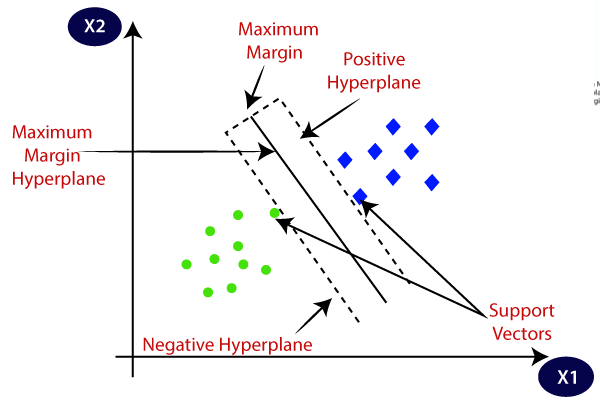

## 3. When using SVMs, why is it necessary to scale the inputs?

**Ans:**

Scaling the inputs is essential when using Support Vector Machines (SVMs) for several reasons:

1. **Sensitivity to Feature Magnitudes:** SVMs are sensitive to the scale of input features. If features have different orders of magnitude (e.g., one feature is in the range of 0-1, while another is in the range of 0-1000), the SVM might give undue importance to features with larger magnitudes. This can lead to suboptimal performance because the decision boundary will be dominated by the larger-magnitude features, and smaller-magnitude features may have little influence.


2. **Regularization and Kernel Parameters:** The performance of an SVM is influenced by its hyperparameters, such as the regularization parameter (C) and kernel parameters (e.g., the gamma parameter in the case of RBF kernel). The scale of input features can affect the optimal choice of these parameters. If features are not scaled, it can be challenging to find the right combination of hyperparameters, which may lead to overfitting or underfitting.


3. **Faster Convergence:** SVM optimization algorithms, such as Sequential Minimal Optimization (SMO), converge faster when input features are standardized or scaled. Scaling can help the algorithm converge in fewer iterations, reducing training time.


4. **Numerical Stability:** Large differences in feature magnitudes can cause numerical instability during the optimization process, leading to potential errors and numerical issues in the SVM training.

## 4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance?

**Ans:**

Support Vector Machines (SVM) primarily perform binary classification by finding the optimal hyperplane that separates data points into two classes. The decision boundary is determined by a margin, and SVM aims to maximize this margin. While SVM itself is not designed to provide probabilities or percentage chances. However, there are ways to obtain confidence scores or probabilities for SVM classifications such as-

- SVM Decision Function:
- Platt Scaling:
- LibSVM and LibLinear Probability Estimates:


Keep in mind that SVMs are originally designed for binary classification, and estimating probabilities is a secondary consideration. If you require probability estimates, it may be more straightforward to use other classifiers like logistic regression or ensemble methods (e.g., Random Forest or Gradient Boosting), which are inherently probabilistic and provide probability scores for multiple classes.

## 5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem?

**Ans:**

For large-scale datasets with millions of instances and hundreds of features, it's generally more practical to use the primal form of SVM, but the choice should be based on the specific characteristics of your problem, available computational resources, and whether your data is linearly or non-linearly separable.

## 6. Let's say you&#39;ve used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C?

**Ans:**

When your SVM classifier with an RBF (Radial Basis Function) kernel is underfitting the training data, you can consider adjusting the hyperparameters, specifically the `gamma` parameter and the `C` parameter. Here's how you might adjust them:

1. **Gamma (`gamma`):**
   - **Increase Gamma:** If your RBF kernel **SVM underfits the data**, raising the `gamma` parameter will make the decision boundary more flexible and better able to fit the training data. A higher `gamma` will result in a more complex, wiggly decision boundary, which can capture finer details in the data. However, be cautious not to increase it too much, as very high `gamma` values can lead to overfitting.


   - **Decrease Gamma:** Conversely, if your model is overfitting or the decision boundary is too complex, reducing the `gamma` parameter will make the decision boundary smoother and more likely to generalize well. Lower `gamma` values will have a broader impact on the decision boundary.


2. **C (`C`):**
   - **Increase C:** If your **SVM is underfitting**, raising the `C` parameter increases the penalty for misclassifications in the training data. This encourages the SVM to better fit the training data, potentially leading to a more complex decision boundary. Increasing `C` allows the SVM to tolerate some misclassification errors in exchange for a more accurate fit.


   - **Decrease C:** On the other hand, if your SVM is overfitting, reducing the `C` parameter decreases the penalty for misclassifications. This can lead to a simpler decision boundary that is more focused on generalization.


## 7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set?

**Ans:**

To solve the soft margin linear SVM classifier problem with a Quadratic Programming (QP) solver, you need to set up the QP problem correctly with the appropriate parameters (H, f, A, and b). Here's how you should set these parameters:

1. **Objective Function (H and f):**
   - **H (Hessian matrix):** The Hessian matrix (H) corresponds to the second derivative of the SVM's objective function with respect to the model's parameters. For soft margin linear SVM, H is typically a positive definite matrix that depends on the kernel and regularization parameters.


   - **f (Linear term):** The linear term (f) corresponds to the coefficients of the linear part of the objective function. In the case of a soft margin linear SVM, this is derived from the regularization parameter (C) and the input data. It's essentially a vector of ones or zeros representing the misclassification errors.


2. **Equality Constraints (A and b):**
   - The equality constraints in the SVM problem are typically not used for soft margin linear SVMs. You usually set the equality constraints (A) to an empty matrix or a matrix of zeros. Therefore, you don't need to specify the right-hand side (b) for equality constraints.

In short-

- **H (Hessian matrix):** This depends on the kernel and regularization parameters.
- **f (Linear term):** Computed based on the regularization parameter and input data.
- **A (Equality constraint matrix):** An empty matrix or a matrix of zeros.
- **b (Right-hand side for equality constraints):** Usually not needed (set to zeros or left empty).



## 8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours.

**Ans:**

In [1]:
# Import required libreries

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Generate a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a LinearSVC
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, y_train)

LinearSVC(dual=False)

In [5]:
# Train an SVC with a linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Train an SGDClassifier with hinge loss (linear SVM)
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [7]:
# Make predictions
y_pred_linear_svc = linear_svc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_sgd_classifier = sgd_classifier.predict(X_test)

In [8]:
# Calculate accuracies
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_sgd_classifier = accuracy_score(y_test, y_pred_sgd_classifier)

In [9]:
# Compare accuracies
print(f"LinearSVC Accuracy: {accuracy_linear_svc:.2f}")
print(f"SVC Accuracy: {accuracy_svc:.2f}")
print(f"SGDClassifier Accuracy: {accuracy_sgd_classifier:.2f}")

LinearSVC Accuracy: 1.00
SVC Accuracy: 0.95
SGDClassifier Accuracy: 1.00


## 9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve?

**Ans:**

In [29]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
# Load the MNIST dataset from openml
mnist = fetch_openml("mnist_784", parser="pandas")

In [12]:
X, y = mnist["data"], mnist["target"]

In [13]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train a multi-class SVM classifier
svm_clf = SVC(kernel="rbf", decision_function_shape="ovr", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

In [17]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

In [19]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.963


## 10. On the California housing dataset, train an SVM regressor.

**Ans:**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [21]:
# Load the California housing dataset
housing = fetch_california_housing()

In [33]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [34]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
# Split the data into features (X) and target (y)
X = housing.data
y = housing.target

In [23]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Train an SVM regressor
svm_regressor = SVR(kernel="linear")
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [26]:
# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

In [27]:
# Calculate the mean squared error of the regressor
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5792291127963858


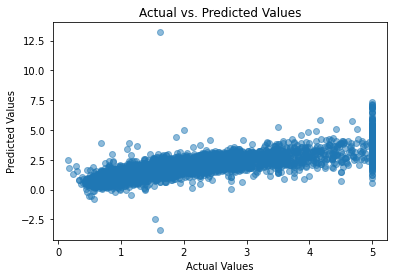

In [28]:
# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()